## Problem statement

Predict the diabetes status of a patient given their health measurements

# 1) Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2) Loading dataset
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [3]:
# read the data into a Pandas DataFrame
import pandas as pd
pima = pd.read_csv('diabetes.csv')

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(pima.columns) # to know all the features(variables) we got in our data

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


**Detail about each feature**

Pregnancies: Number of times pregnant <br>

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>

BloodPressure: Diastolic blood pressure (mm Hg) <br>

SkinThickness: Triceps skin fold thickness (mm) <br>

Insulin: 2-Hour serum insulin (mu U/ml) <br>

BMI: Body mass index (weight in kg/(height in m)^2) <br>

DiabetesPedigreeFunction: Diabetes pedigree function <br>

Age: Age (years) <br>

Outcome: Class variable (0 or 1) <br>

In [6]:
pima.shape

(768, 9)

In [7]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
pima.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [10]:
pima['Outcome'].value_counts().sort_values(ascending=False)

0    500
1    268
Name: Outcome, dtype: int64

# 3) Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE5A96DC18>,
      dtype=object)

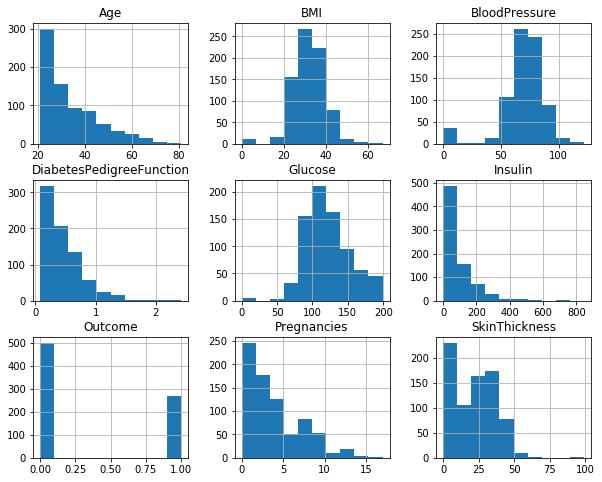

In [11]:
pima.hist(figsize=(10,8))

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

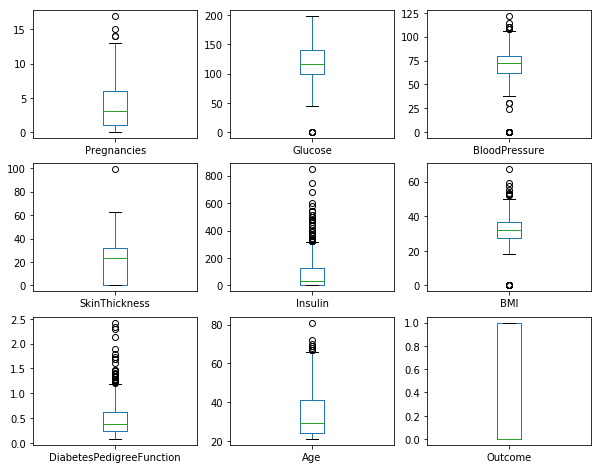

In [12]:
pima.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [13]:
corr = pima[pima.columns].corr()

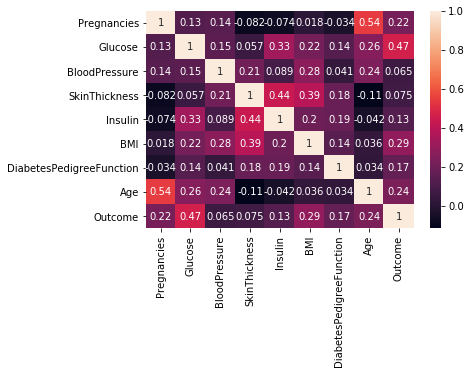

In [14]:
sns.heatmap(corr, annot = True)

# 4) Feature Extraction

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
x = pima.iloc[:,0:8]
y = pima.iloc[:,8]
select_top_4 = SelectKBest(score_func=chi2, k = 4)

In [17]:
fit = select_top_4.fit(x,y)
features = fit.transform(x)

In [18]:
features[0:5]

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       [ 89. ,  94. ,  28.1,  21. ],
       [137. , 168. ,  43.1,  33. ]])

In [19]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**So, the top performing features are Glucose, Insulin, BMI, Age**

In [20]:
# define X and y
X_features = pd.DataFrame(data = features, columns = ["Glucose","Insulin","BMI","Age"])
y = pima.Outcome

In [21]:
type(X_features)

pandas.core.frame.DataFrame

In [22]:
X_features.head()

,Glucose,Insulin,BMI,Age
0,148.0,0.0,33.6,50.0
1,85.0,0.0,26.6,31.0
2,183.0,0.0,23.3,32.0
3,89.0,94.0,28.1,21.0
4,137.0,168.0,43.1,33.0


# 5) Standardization
changes the attribute values to Guassian distribution with mean as 0 and standard deviation as 1

In [23]:
from sklearn.preprocessing import StandardScaler
rescaledX = StandardScaler().fit_transform(X_features)

In [24]:
X = pd.DataFrame(data = rescaledX, columns= X_features.columns)

In [25]:
X.head()

,Glucose,Insulin,BMI,Age
0,0.848324,-0.692891,0.204013,1.425995
1,-1.123396,-0.692891,-0.684422,-0.190672
2,1.943724,-0.692891,-1.103255,-0.105584
3,-0.998208,0.123302,-0.494043,-1.041549
4,0.504055,0.765836,1.409746,-0.020496


# 6) Binary Classification

## a- split X and y into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## b- train a logistic regression model

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## c- Make class predictions for the testing set

In [28]:
y_pred_class = logreg.predict(X_test)

## d-calculate accuracy

In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7708333333333334


## e- Null Accuracy

In [30]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [31]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [32]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [33]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [34]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

# 7) Prediction using Test Data--- confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [35]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[115,  15],
       [ 29,  33]], dtype=int64)

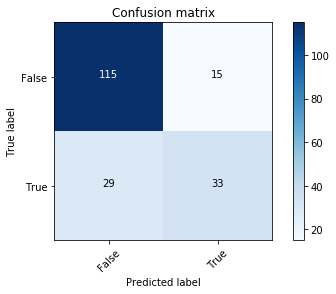

In [37]:
# False=0; True=1
plot_confusion_matrix(cm, classes=['False', 'True'])

In [38]:
# slice confusion matrix into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

## Metrics computed from a confusion matrix
- Classification Accuracy <br>
- Classification Error <br>
- Sensitivity <br>
- Specificity <br>


### a-Classification Accuracy 
shows how often is the classifier correct i.e same as accuracy score<br>
%age of correct prediction

In [39]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7708333333333334
0.7708333333333334


### b-Classification Error
how often is the classifier incorrect

In [40]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.22916666666666666
0.22916666666666663


### c-Sensitivity
When the actual value is positive, how often is the prediction correct?<br>
How "sensitive" is the classifier to detecting positive instances?<br>
Also known as "True Positive Rate" or "Recall"

In [41]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.532258064516129
0.532258064516129


### d- Specificity
When the actual value is negative, how often is the prediction correct?<br>
How "specific" (or "selective") is the classifier in predicting positive instances?

In [42]:
print(TN / float(TN + FP))

0.8846153846153846


### e-False Positive Rate <br>
When the actual value is negative, how often is the prediction incorrect?

In [43]:
print(FP / float(TN + FP))

0.11538461538461539


### f-Precision<br> 
When a positive value is predicted, how often is the prediction correct?<br>
How "precise" is the classifier when predicting positive instances?

In [44]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.6875
0.6875


# 8) classification threshold
Using predic_proba

In [45]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [46]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.09663414, 0.90336586],
       [0.81004686, 0.18995314],
       [0.90681733, 0.09318267],
       [0.36410507, 0.63589493],
       [0.85965376, 0.14034624],
       [0.94324674, 0.05675326],
       [0.42872137, 0.57127863],
       [0.17367998, 0.82632002],
       [0.7944936 , 0.2055064 ],
       [0.56298046, 0.43701954]])

In [47]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.90336586, 0.18995314, 0.09318267, 0.63589493, 0.14034624,
       0.05675326, 0.57127863, 0.82632002, 0.2055064 , 0.43701954])

In [48]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [49]:
#plot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

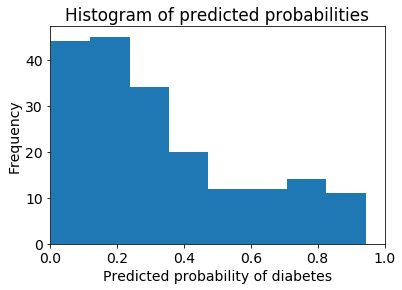

In [50]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the **sensitivity** of the classifier.<br>
By default, value is 0.5

In [51]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [52]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.90336586, 0.18995314, 0.09318267, 0.63589493, 0.14034624,
       0.05675326, 0.57127863, 0.82632002, 0.2055064 , 0.43701954])

In [53]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [54]:
# previous confusion matrix (default threshold of 0.5)
print(cm)

[[115  15]
 [ 29  33]]


In [55]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[92 38]
 [14 48]]


In [56]:
# sensitivity has increased (used to be 0.53)
print(metrics.recall_score(y_test, y_pred_class))

0.7741935483870968


In [57]:
# specificity has decreased (used to be 0.88)
#TN / float(TN + FP)
print(80 / float(80 + 50))

0.6153846153846154


In [58]:
# Precison decreased too ...used to be 0.68
print(metrics.precision_score(y_test, y_pred_class))

0.5581395348837209


## i- ROC curves
see how sensitivity and specificity are affected by various thresholds

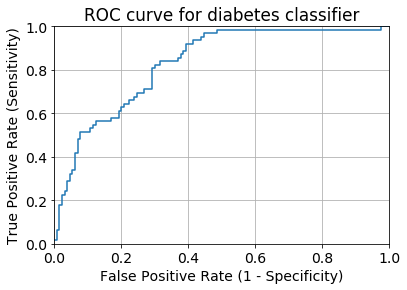

In [59]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**We can't actually see the thresholds used to generate the curve on the ROC curve itself**

In [60]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [61]:
evaluate_threshold(0.5)

Sensitivity: 0.532258064516129
Specificity: 0.8846153846153846


In [62]:
evaluate_threshold(0.3)

Sensitivity: 0.7096774193548387
Specificity: 0.7076923076923076


## ii- AUC (Area under curve)
percentage of the ROC plot that is underneath the curve

In [63]:
#first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8296526054590571


In [64]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8207692307692307

**Conclusion:We can tune our model according to requirement i.e sensitivity or precision**